In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from datetime import datetime
import matplotlib.pyplot as plt

## 1. Leitura e visualização da base de dados

In [3]:
# Leitura das bases
df_train = pd.read_csv('../data/train.csv.zip')
df_test = pd.read_csv('../data/test.csv.zip')

In [4]:
# Visualização da base treino
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Visualização da base teste
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Pré-processamento

In [6]:
# Instância para normalizar os dados
normalizer = MinMaxScaler(feature_range = (0, 1))

# Instância para transformar os dados em binário
lb = LabelBinarizer()

In [7]:
# Entradas de treino e teste
x_train, x_test = df_train.iloc[:, 1:785], df_test

# Saídas de treino
y_train = df_train['label']

In [8]:
# Normaliza os dados de entrada de treino e de teste
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.fit_transform(x_test)

In [9]:
# Binariza as saídas
y_train = lb.fit_transform(y_train)

In [10]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28, 28, 1)

## 3. Implementação da rede neural

In [11]:
# Cria o modelo
model = Sequential()

In [12]:
# Camada de entrada  
model.add(Conv2D(30, 
                 kernel_size = 4, 
                 activation = 'relu', 
                 input_shape = (28, 28, 1)))

model.add(MaxPool2D(2))

model.add(Flatten())
# Camada de saída
model.add(Dense(10, activation = 'softmax'))

In [13]:
# Sumário do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 30)        510       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4320)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                43210     
Total params: 43,720
Trainable params: 43,720
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compila o modelo
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Adiciona callbacks
early_stopping = EarlyStopping(monitor = 'val_loss', 
                               patience = 1)

## 4. Treinamento da rede neural

In [15]:
history = model.fit(x_train, 
                    y_train, 
                    epochs = 20,  
                    shuffle = True, 
                    verbose = 1, 
                    batch_size = 10,
                    validation_split = 0.3,
                    callbacks = [early_stopping])

Epoch 1/20
2940/2940 [==============================] - 12s 4ms/step - loss: 0.2079 - accuracy: 0.9377 - val_loss: 0.1094 - val_accuracy: 0.9650
Epoch 2/20
2940/2940 [==============================] - 12s 4ms/step - loss: 0.0769 - accuracy: 0.9771 - val_loss: 0.0792 - val_accuracy: 0.9760
Epoch 3/20
2940/2940 [==============================] - 12s 4ms/step - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0644 - val_accuracy: 0.9797
Epoch 4/20
2940/2940 [==============================] - 12s 4ms/step - loss: 0.0411 - accuracy: 0.9867 - val_loss: 0.0668 - val_accuracy: 0.9790


In [24]:
# Salva o modelo
file_name = f'cnn_{datetime.now().strftime("%d-%m-%Y_%Hh%Mm%Ss")}'
model.save(f'../modelos/{file_name}.h5')

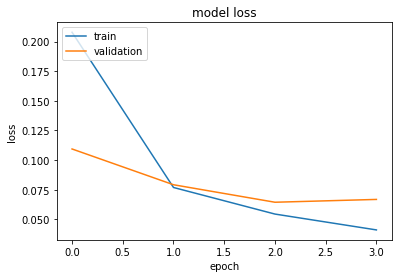

In [25]:
# Plota os erros de treinamento e de validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 5. Realizar as predições

In [26]:
predicoes = model.predict(x_test)

In [27]:
# Arredonda os valores encontrados (serão sempre 0 ou 1)
for i in range(predicoes.shape[0]):
    for j in range(predicoes.shape[1]):
        predicoes[i][j] = round(predicoes[i][j], 0)

In [28]:
# Mostra as predições (ainda em binário)
print(predicoes)

[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [29]:
# Desconverte a binarização
predicoes_int = lb.inverse_transform(predicoes)

## 6. Comparação dos resultados

In [30]:
# Mostra os 10 primeiros dígitos previstos
for i in range(15):
    print(predicoes_int[i])

2
0
9
0
3
7
0
3
0
3
5
7
4
0
4


In [31]:
# Reorganiza as colunas numa matriz 28x28
teste_imagens = df_test.values.reshape(-1,28,28,1)

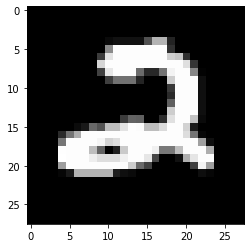

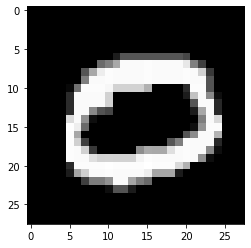

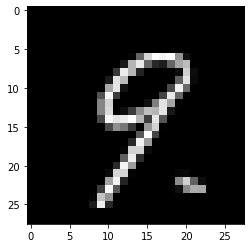

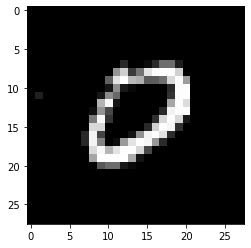

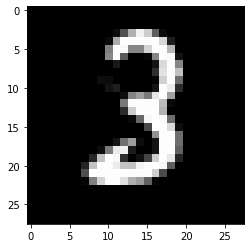

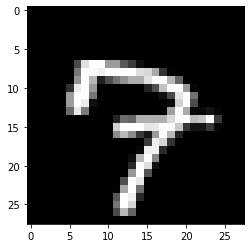

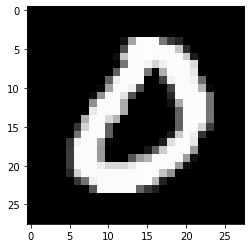

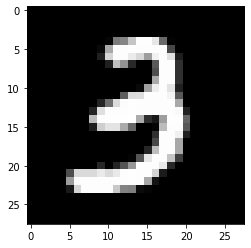

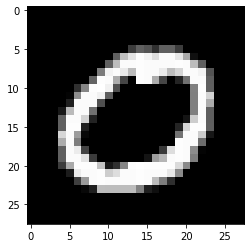

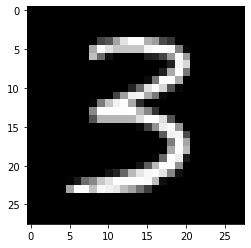

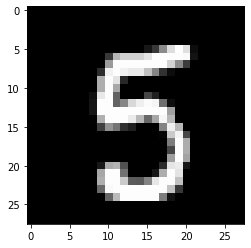

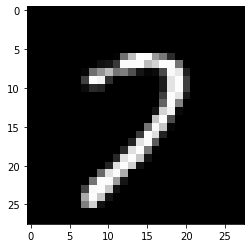

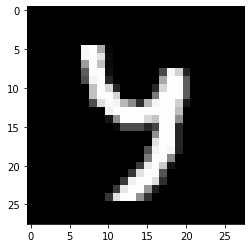

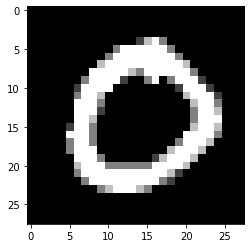

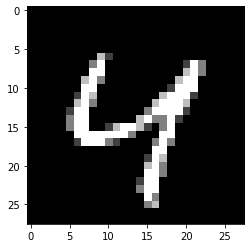

In [32]:
# Plota os 15 primeiros dígitos que a rede deveria prever na base de teste
for i in range(15):
    plt.imshow(teste_imagens[i], cmap = 'gray')
    plt.show()

## 7. Cria .csv com as predições

In [35]:
# Cria dicionário com a chave labels
dict_predicoes = {'ImageID': np.arange(1,28001),
                  'Label': predicoes_int}

# Passa para dataframe
df_predicoes = pd.DataFrame(dict_predicoes)
df_predicoes.set_index('ImageID', inplace = True)

# Converte em csv
df_predicoes.to_csv('../submissao/predicoes.csv') 

In [36]:
df_predicoes.head()

,Label
ImageID,
1,2
2,0
3,9
4,0
5,3


## O arquivo predicoes.csv é usado para avaliar a rede no site do Kaggle